# DDPG/TD3/SAC training of baseline with quadratic reward (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import gym_gyroscope_env

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from functools import partial

## Environment Class and Modules

In [2]:
simu_args = {
    'dt': 0.05,
    'ep_len': 110,
    'seed': 2
}
reward_func = 'Quadratic'
reward_args = {
    'qx1':9,
    'qx2':0.05,
    'qx3':9,
    'qx4':0.05,
    'pu1':0.1,
    'pu2':0.1
}
env_fn = partial(env_fn, env_name = 'GyroscopeEnv-v0', simu_args = simu_args, reward_func = reward_func, reward_args = reward_args)

## Training

#### DDPG

In [3]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_b0', exp_name='ddpg_b0')
seed_b = 0
epochs_b = 2
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, 
                    replay_size = repsize_b, gamma = gamma_b, polyak = polyak_b, batch_size = batchsize_b, 
                    start_steps = startsteps_b, max_ep_len = maxeplen_b, logger_kwargs = logger_kwargs, 
                    act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_b0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(<function env_fn at 0x7fe9b4e0dd40>, env_name='GyroscopeEnv-v0', simu_args={'dt': 0.05, 'ep_len': 110, 'seed': 2}, reward_func='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1})",
    "epochs":	2,
    "exp_name":	"ddpg_b0",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fe9bb2dc290>":	{
            "epoch_dict":	{},
            "exp_name":	"ddpg_b0",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"ddpg_b0",
            "output_file":	{
                "<_io.TextIOWrapper name='ddpg_b0/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "m

In [ ]:
# Setup baseline 1
logger_kwargs = dict(output_dir='ddpg_b1', exp_name='ddpg_b1')
seed_b = 10
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 20000
args_b = dict(hidden_sizes=[1000,], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# Baseline 1 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

In [ ]:
# Setup baseline 2
logger_kwargs = dict(output_dir='ddpg_b2', exp_name='ddpg_b2')
seed_b = 10
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 20000
args_b = dict(hidden_sizes=[400,400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# Baseline 2 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

#### TD3

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='td3_b0', exp_name='td3_b0')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400,], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.5


# Baseline 0 training
spinup.td3_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 1
logger_kwargs = dict(output_dir='td3_b1', exp_name='td3_b1')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[1000,], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.1


# Baseline 1 training
spinup.td3_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

In [ ]:
# Setup baseline 2
logger_kwargs = dict(output_dir='td3_b2', exp_name='td3_b2')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400,400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# TD3 specific params
pd_b = 2
targnoise_b = 0.2
noiseclip_b = 0.1


# Baseline 2 training
spinup.td3_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b, policy_delay = pd_b, target_noise = targnoise_b, noise_clip = noiseclip_b)

#### SAC

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='sac_b0', exp_name='sac_b0')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400,], activation=torch.nn.ReLU)
lr_b = 0.0025
alpha_b = 0.2


# Baseline 0 training
spinup.sac_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, lr = lr_b, alpha = alpha_b)

In [ ]:
# Setup baseline 1
logger_kwargs = dict(output_dir='sac_b1', exp_name='sac_b1')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.9
batchsize_b = 100
startsteps_b = 5000
args_b = dict(hidden_sizes=[1000,], activation=torch.nn.ReLU)
lr_b = 0.001
alpha_b = 0.2


# Baseline 1 training
spinup.sac_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, lr = lr_b, alpha = alpha_b)

In [ ]:
# Setup baseline 2
logger_kwargs = dict(output_dir='sac_b2', exp_name='sac_b2')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.99
polyak_b = 0.9
batchsize_b = 100
startsteps_b = 5000
args_b = dict(hidden_sizes=[400,400], activation=torch.nn.ReLU)
lr_b = 0.001
alpha_b = 0.2


# Baseline 2 training
spinup.sac_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, lr = lr_b, alpha = alpha_b)

#### DDPG with longer episode length (to better approximate infinite horizon reward and see if it cancels SS error)

In [ ]:
# Setup baseline 2
logger_kwargs = dict(output_dir='ddpg_b0_ep400', exp_name='ddpg_b0_ep400')
seed_b = 0
epochs_b = 100
maxeplen_b = 220

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 2 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

In [ ]:
# Setup baseline 2
logger_kwargs = dict(output_dir='ddpg_b0_ep400_10', exp_name='ddpg_b0_ep400_10')
seed_b = 10
epochs_b = 100
maxeplen_b = 220

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 2 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

## Test

In [1]:
import gym
from gym import spaces
from gym.utils import seeding

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import gym_gyroscope_env

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from functools import partial

In [2]:
# Test paramaters
env_name = 'GyroscopeEnv-v0'
simu_args = {'dt': 0.05, 'ep_len': 220,'seed': 2}
reward_func = 'Absolute'
reward_args = {'qx1':9, 'qx2':0.05, 'qx3':9, 'qx4':0.05, 'pu1':0.1, 'pu2':0.1}

agent_path = 'td3_q_test'
init_state = [1,1,2,1,2,1,20]
t_end = 220 * 0.05

# Perform testing
score, state_record, obs_record, action_record, reward_record = \
    test_agent(env_name, simu_args, reward_func, reward_args, agent_path, init_state, t_end)

Total cumulative reward: -760.9305839520497


## Plot

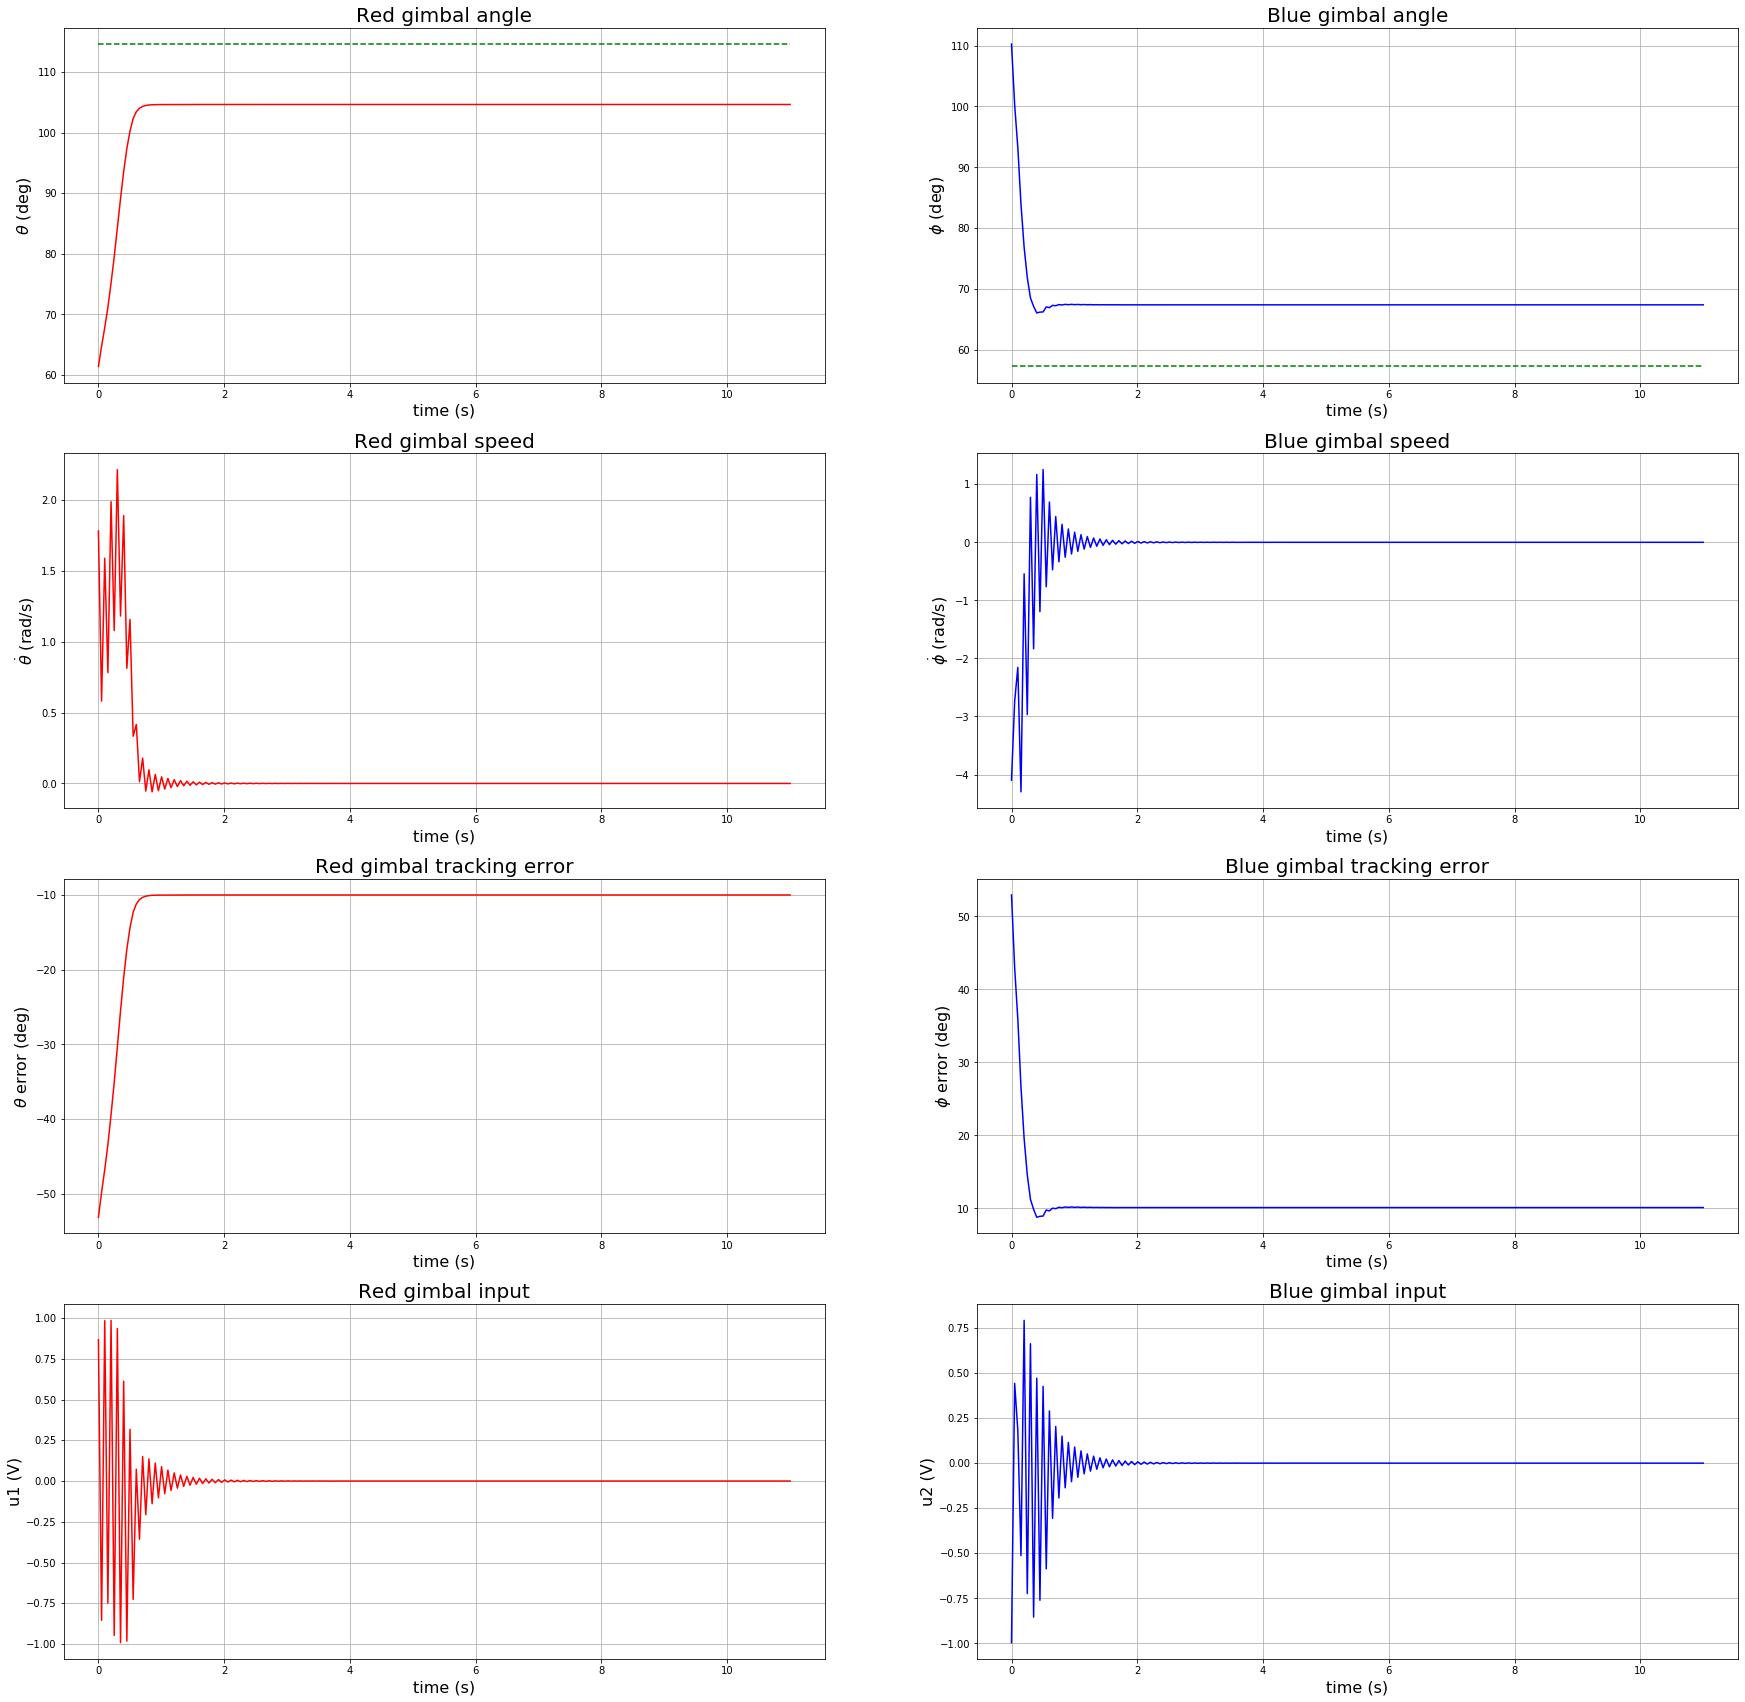

In [3]:
plot_test(state_record ,action_record, t_end)

## Evaluate control performance

In [ ]:
# Single evaluation
env_name = 'GyroscopeEnv-v0'
agent_path = 'ddpg_b0'
ss_bound = 0.3
metrics = evaluate_control(env_name,agent_path,ss_bound)
metrics

In [ ]:
# Init dataframe
env_name = 'gyroscopeenv-v0'
agent_paths = ['ddpg_b0','ddpg_b1','ddpg_b2','td3_b0','td3_b1','td3_b2','sac_b0','sac_b1','sac_b2',]
ss_bound = 0.3

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

# Show
metrics

In [ ]:
# Manipulate
metrics_man = metrics[['$\theta$ MAE (rad)','$\phi$ MAE (rad)','$\theta$ MSSE (rad)','$\phi$ MSSE (rad)','$\theta$ in bounds (%)','$\phi$ in bounds (%)','$\theta$ unsteady (%)','$\phi$ unsteady (%)','u1 (V)','u2 (V)','u1 variation (V)','u2 variation (V)']]
metrics_man = metrics_man.transpose()
metrics_man = metrics_man.round(2)
metrics_man

In [ ]:
# To LaTex
print(metrics_man.to_latex(escape=False))